In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype
import random
import scipy
from scipy.stats import ttest_ind

# Import Data and reduce size of No FB datapoints by 95% (Makes both distributions more visible)

In [50]:
df = pd.read_csv('FullDataset.csv',usecols=['Date','BZ_North','Magnetometer_Magnitude','Magnetometer_Theta','Magnetometer_Phi','Velocity_Latitude_n/s','Velocity_Latitude_e/w','Labels'])
dropindices = df[df['Labels'] == 0].index.tolist()
dropindices = random.sample(dropindices, int(len(dropindices) * 0.95))
df = df.drop(dropindices)
df.describe()

,BZ_North,Magnetometer_Magnitude,Magnetometer_Theta,Magnetometer_Phi,Velocity_Latitude_n/s,Velocity_Latitude_e/w,Labels
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000
mean,2.245802,190.954430,0.234569,1.450648,-112.235565,-3.876694,0.128030
std,7.567345,187.876528,0.799050,0.561539,555.537326,485.230535,0.334227
min,-38.854779,1.846619,-1.566094,0.060265,-1792.768534,-2014.640928,0.000000
25%,0.000000,47.836074,-0.219651,1.116550,-322.066192,-6.306599,0.000000
50%,1.276456,122.070226,0.373577,1.399990,-53.268895,91.374374,0.000000
75%,4.984332,264.985452,0.843607,1.754203,132.824472,236.253515,0.000000
max,29.418763,1285.262156,1.570796,3.136918,2126.185380,1150.825943,1.000000


<Axes: xlabel='BZ_North', ylabel='Count'>

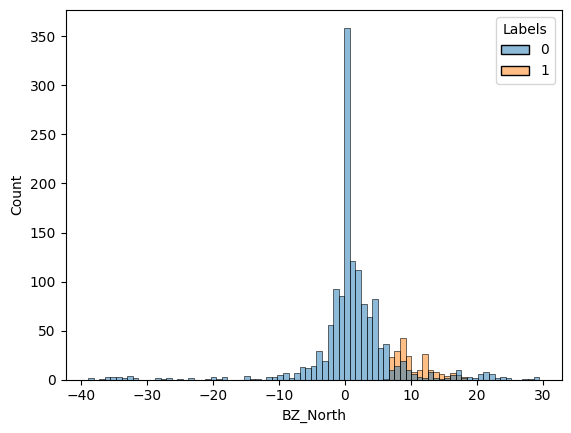

In [51]:
sns.histplot(data=df,x='BZ_North',hue='Labels')

<Axes: xlabel='Magnetometer_Magnitude', ylabel='Count'>

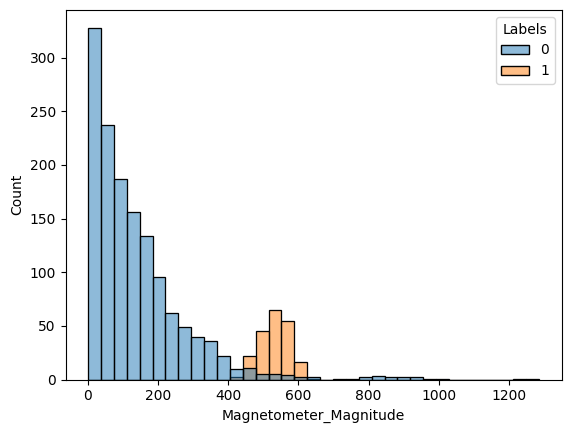

In [52]:
sns.histplot(data=df,x='Magnetometer_Magnitude',hue='Labels')

<Axes: xlabel='Velocity_Latitude_n/s', ylabel='Count'>

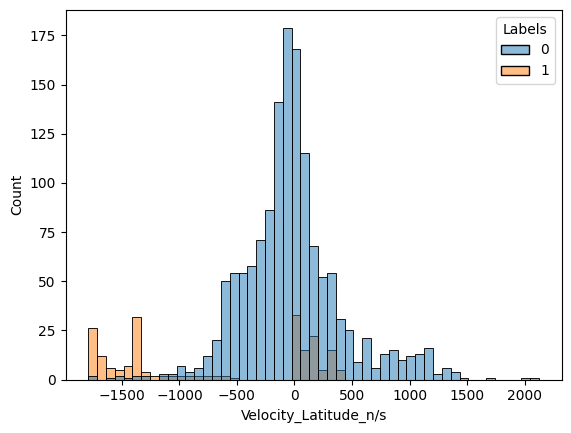

In [53]:
sns.histplot(data=df,x='Velocity_Latitude_n/s',hue='Labels')

<Axes: xlabel='Velocity_Latitude_e/w', ylabel='Count'>

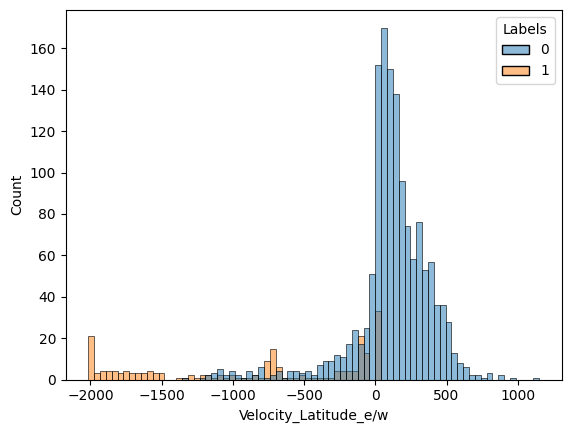

In [54]:
sns.histplot(data=df,x='Velocity_Latitude_e/w',hue='Labels')

# T-Test to ensure FB Samples are in different distribution for each variable

In [55]:
FB_Present = df[df['Labels'] == 1]
FB_NotPresent = df[df['Labels'] == 0]

# T-tests
print(ttest_ind(FB_Present['BZ_North'], FB_NotPresent['BZ_North']))
print(ttest_ind(FB_Present['Magnetometer_Magnitude'], FB_NotPresent['Magnetometer_Magnitude']))
print(ttest_ind(FB_Present['Velocity_Latitude_n/s'], FB_NotPresent['Velocity_Latitude_n/s']))
print(ttest_ind(FB_Present['Velocity_Latitude_e/w'], FB_NotPresent['Velocity_Latitude_e/w']))

Ttest_indResult(statistic=18.37983232400886, pvalue=1.2507017564432996e-68)
Ttest_indResult(statistic=39.42627171885467, pvalue=2.1377205462765307e-238)
Ttest_indResult(statistic=-18.240817629611858, pvalue=1.033940842627576e-67)
Ttest_indResult(statistic=-33.74855698989099, pvalue=3.403226332281898e-189)


# Pearson Correlation Test to see if linear relationship between variables. (Should be very small)

In [56]:
# Correlation Tests BZ_North
corr, p_values = scipy.stats.pearsonr(df['BZ_North'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['BZ_North'], df['Velocity_Latitude_n/s'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['BZ_North'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

0.24341531881489337 3.930935033026165e-23
-0.41907346411777174 1.9170479635666365e-69
-0.2663502843354847 1.5566086414951913e-27


In [57]:
# Correlation Tests Magnetometer_Magnitude
corr, p_values = scipy.stats.pearsonr(df['Magnetometer_Magnitude'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Magnetometer_Magnitude'], df['Velocity_Latitude_n/s'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Magnetometer_Magnitude'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

0.24341531881489337 3.930935033026165e-23
-0.060146792178090686 0.015824492793150773
-0.43370964880828883 8.79134683617171e-75


In [58]:
# Correlation Tests Velocity_Latitude_n/s
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_n/s'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_n/s'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_n/s'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

-0.41907346411777174 1.9170479635666365e-69
-0.060146792178090686 0.015824492793150773
0.09645591444270227 0.00010657914286030395


In [59]:
# Correlation Tests Velocity_Latitude_e/w
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_e/w'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_e/w'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.pearsonr(df['Velocity_Latitude_e/w'], df['Velocity_Latitude_n/s'])
print(corr, p_values)

-0.2663502843354847 1.5566086414951913e-27
-0.43370964880828883 8.79134683617171e-75
0.09645591444270227 0.00010657914286030395


# Spearman Correlation Test to see if variables increase/decrease together (monotonic)

In [60]:
# Correlation Tests BZ_North
corr, p_values = scipy.stats.spearmanr(df['BZ_North'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['BZ_North'], df['Velocity_Latitude_n/s'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['BZ_North'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

0.2510430917442916 1.5119028057250206e-24
-0.1905685842890079 1.2684540602768664e-14
-0.2649333199823283 2.9998463040307823e-27


In [61]:
# Correlation Tests Magnetometer_Magnitude
corr, p_values = scipy.stats.spearmanr(df['Magnetometer_Magnitude'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Magnetometer_Magnitude'], df['Velocity_Latitude_n/s'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Magnetometer_Magnitude'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

0.2510430917442916 1.5119028057250206e-24
0.22710699629194084 2.8757950371698794e-20
-0.23923960316283072 2.231768660337963e-22


In [62]:
# Correlation Tests Velocity_Latitude_n/s
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_n/s'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_n/s'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_n/s'], df['Velocity_Latitude_e/w'])
print(corr, p_values)

-0.1905685842890079 1.2684540602768664e-14
0.22710699629194084 2.8757950371698794e-20
0.029385378165014017 0.2387748050862564


In [63]:
# Correlation Tests Velocity_Latitude_e/w
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_e/w'], df['BZ_North'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_e/w'], df['Magnetometer_Magnitude'])
print(corr, p_values)
corr, p_values = scipy.stats.spearmanr(df['Velocity_Latitude_e/w'], df['Velocity_Latitude_n/s'])
print(corr, p_values)

-0.2649333199823283 2.9998463040307823e-27
-0.23923960316283072 2.231768660337963e-22
0.029385378165014017 0.2387748050862564


[Text(0.5, 1.0, 'FB Present BZ_North histogram')]

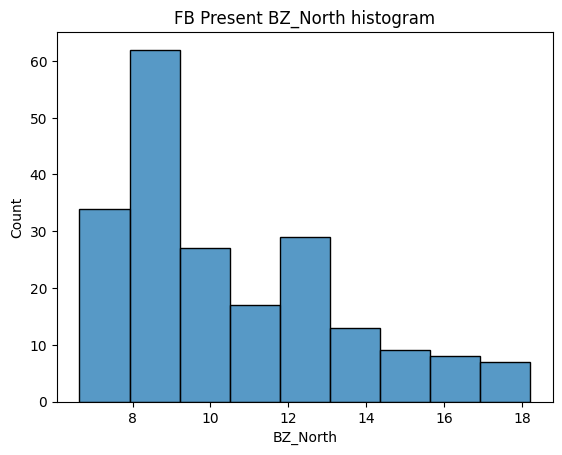

In [64]:
sns.histplot(data=FB_Present,x='BZ_North').set(title="FB Present BZ_North histogram")

[Text(0.5, 1.0, 'FB Present Magnetometer_Magnitude histogram')]

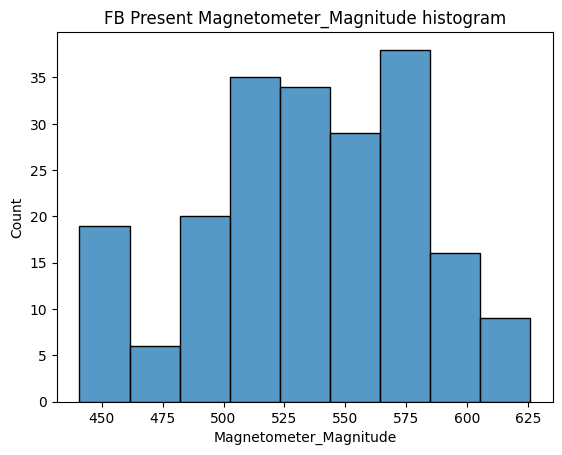

In [65]:
sns.histplot(data=FB_Present,x='Magnetometer_Magnitude').set(title="FB Present Magnetometer_Magnitude histogram")

[Text(0.5, 1.0, 'FB Present Velocity_Latitude_n/s histogram')]

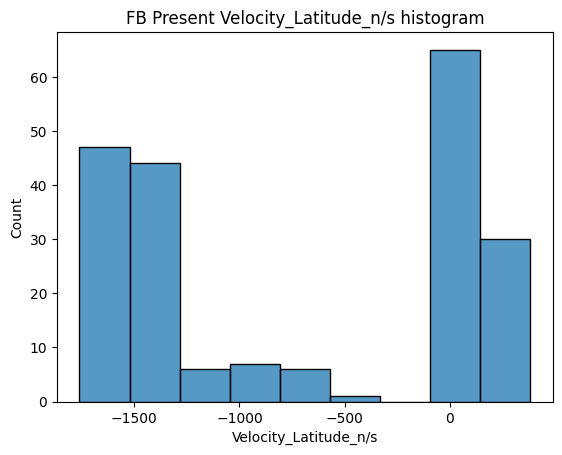

In [66]:
sns.histplot(data=FB_Present,x='Velocity_Latitude_n/s').set(title="FB Present Velocity_Latitude_n/s histogram")

[Text(0.5, 1.0, 'FB Present Velocity_Latitude_e/w histogram')]

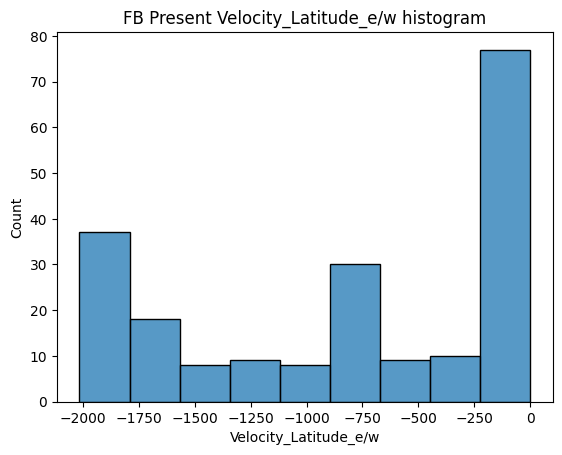

In [67]:
sns.histplot(data=FB_Present,x='Velocity_Latitude_e/w').set(title="FB Present Velocity_Latitude_e/w histogram")

[Text(0.5, 1.0, 'FB Not Present BZ_North histogram')]

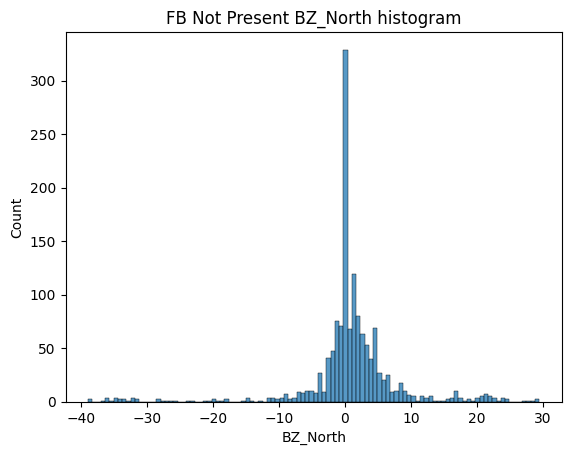

In [68]:
sns.histplot(data=FB_NotPresent,x='BZ_North').set(title="FB Not Present BZ_North histogram")

[Text(0.5, 1.0, 'FB Not Present Magnetometer_Magnitude histogram')]

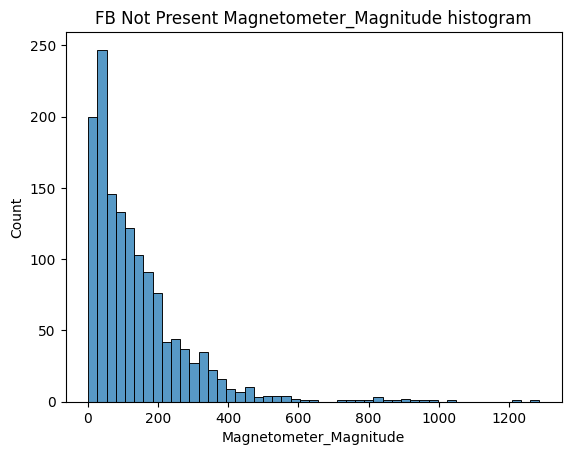

In [69]:
sns.histplot(data=FB_NotPresent,x='Magnetometer_Magnitude').set(title="FB Not Present Magnetometer_Magnitude histogram")

[Text(0.5, 1.0, 'FB Not Present Velocity_Latitude_n/s histogram')]

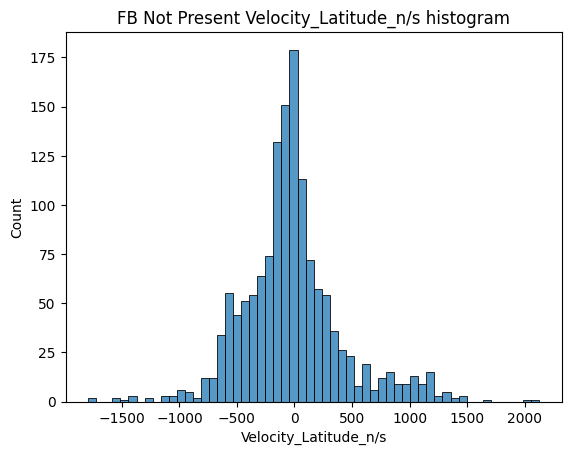

In [70]:
sns.histplot(data=FB_NotPresent,x='Velocity_Latitude_n/s').set(title="FB Not Present Velocity_Latitude_n/s histogram")

[Text(0.5, 1.0, 'FB Not Present Velocity_Latitude_e/w histogram')]

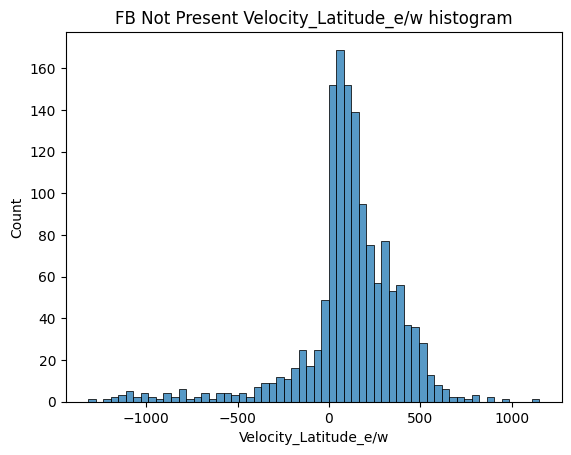

In [71]:
sns.histplot(data=FB_NotPresent,x='Velocity_Latitude_e/w').set(title="FB Not Present Velocity_Latitude_e/w histogram")